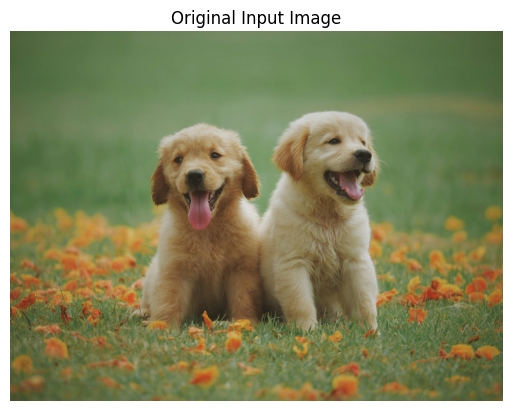

✅ VGG16 and ResNet50 loaded successfully!

🔍 Top 5 Predictions (VGG16):
Golden Retriever: 89.59%
Labrador Retriever: 4.27%
Clumber Spaniel: 1.05%
Cocker Spaniels: 0.91%
Sussex Spaniel: 0.65%

🔍 Top 5 Predictions (ResNet50):
Golden Retriever: 62.11%
Labrador Retriever: 4.04%
tennis ball: 0.97%
Flat-Coated Retriever: 0.43%
Kuvasz: 0.28%

📊 Feature Map Shape: torch.Size([1, 64, 224, 224])


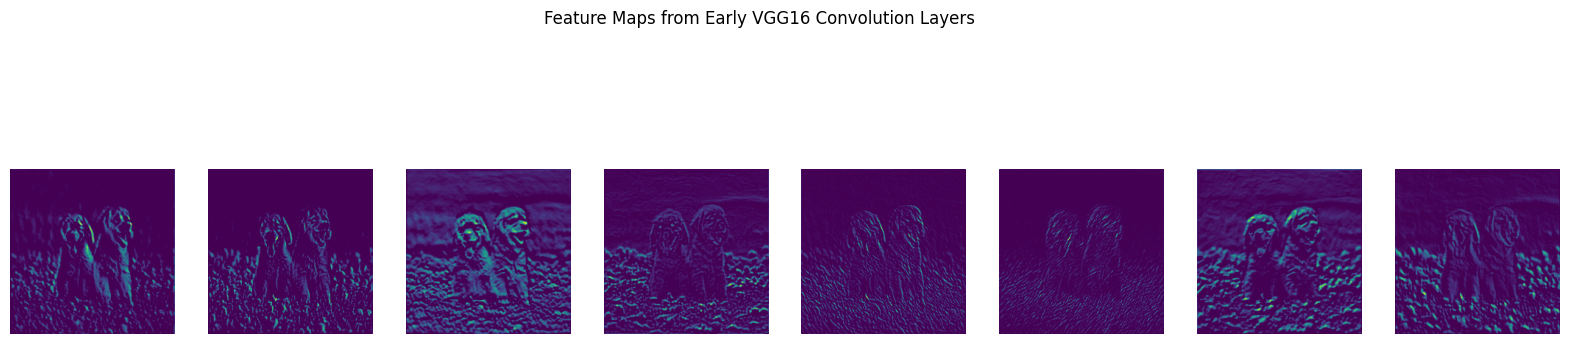

✅ Lab 13 Completed Successfully with Visualization!


In [ ]:

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Step 1: Load a valid image
url = "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg"
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert('RGB')
    plt.imshow(img)
    plt.title("Original Input Image")
    plt.axis("off")
    plt.show()
else:
    print("⚠️ Image download failed.")

# Step 2: Preprocess image for model input
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_image = transform(img).unsqueeze(0)  # (1, 3, 224, 224)

# Step 3: Load pretrained models
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
print("✅ VGG16 and ResNet50 loaded successfully!\n")

# Step 4: Perform prediction
vgg16.eval()
resnet50.eval()
with torch.no_grad():
    vgg_output = vgg16(input_image)
    resnet_output = resnet50(input_image)

# Step 5: Get top-5 predictions
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

vgg_probs = torch.nn.functional.softmax(vgg_output[0], dim=0)
vgg_top5 = torch.topk(vgg_probs, 5)
print("🔍 Top 5 Predictions (VGG16):")
for i in range(5):
    print(f"{labels[vgg_top5.indices[i]]}: {vgg_top5.values[i].item()*100:.2f}%")

resnet_probs = torch.nn.functional.softmax(resnet_output[0], dim=0)
resnet_top5 = torch.topk(resnet_probs, 5)
print("\n🔍 Top 5 Predictions (ResNet50):")
for i in range(5):
    print(f"{labels[resnet_top5.indices[i]]}: {resnet_top5.values[i].item()*100:.2f}%")

# Step 6: Extract early feature maps from VGG16
first_layer_features = nn.Sequential(*list(vgg16.features.children())[:4])
with torch.no_grad():
    feature_maps = first_layer_features(input_image)

print("\n📊 Feature Map Shape:", feature_maps.shape)  # e.g. (1, 64, 224, 224)

# Step 7: Visualize feature maps
num_filters = 8  # Show first 8 filters
fig, axes = plt.subplots(1, num_filters, figsize=(20, 5))
for i in range(num_filters):
    axes[i].imshow(feature_maps[0, i].cpu(), cmap='viridis')
    axes[i].axis('off')
plt.suptitle("Feature Maps from Early VGG16 Convolution Layers")
plt.show()

print("✅ Lab 13 Completed Successfully with Visualization!")
